In [1]:
%pylab inline
from IPython.display import HTML
from pypdb import *
import pprint

Populating the interactive namespace from numpy and matplotlib


## Retrieve Human serum albumin (HSA)

In [2]:
search_dict = make_query('HUman serum albumin')
found_pdbs = do_search(search_dict)
print(found_pdbs)

['1AO6', '1BJ5', '1BKE', '1BM0', '1C1U', '1C1V', '1C1W', '1C5L', '1C5N', '1C5O', '1E78', '1E7A', '1E7B', '1E7C', '1E7E', '1E7F', '1E7G', '1E7H', '1E7I', '1GNI', '1GNJ', '1H9Z', '1HA2', '1HK1', '1HK2', '1HK3', '1HK4', '1HK5', '1ICT', '1N5U', '1O9X', '1TF0', '1UOR', '1YSX', '1Z5M', '1Z7J', '2BX8', '2BXA', '2BXB', '2BXC', '2BXD', '2BXE', '2BXF', '2BXG', '2BXH', '2BXI', '2BXK', '2BXL', '2BXM', '2BXN', '2BXO', '2BXP', '2BXQ', '2ESG', '2I2Z', '2I30', '2J5Y', '2KDL', '2L7U', '2MH8', '2N0X', '2QTJ', '2RCJ', '2ROX', '2ROY', '2VDB', '2VUE', '2VUF', '2XSI', '2XVQ', '2XVU', '2XVV', '2XVW', '2XW0', '2XW1', '2YDF', '3A73', '3B9L', '3B9M', '3CX9', '3JQZ', '3JRY', '3LU6', '3LU7', '3LU8', '3SQJ', '3TDL', '3UIV', '4BKE', '4E99', '4EMX', '4G03', '4G04', '4HGK', '4HGM', '4IW1', '4IW2', '4K2C', '4K71', '4L8U', '4L9K', '4L9Q', '4LA0', '4LB2', '4LB9', '4LUF', '4LUH', '4N0F', '4N0U', '4S1Y', '4Z69', '5FUO', '5FUZ', '5ID7', '5IFO', '5IIH', '5IIU', '5IIX', '5IJ5', '5IJE', '5IJF']


## Search for papers of HSA from PDB

In [3]:
matching_papers = find_papers('HSA', max_results = 4)
pprint.pprint(matching_papers)

['CRYSTALLOGRAPHIC STUDIES OF ISOSTERIC NAD ANALOGUES BOUND TO ALCOHOL '
 'DEHYDROGENASE: SPECIFICITY AND SUBSTRATE BINDING IN TWO TERNARY COMPLEXES',
 'HUMAN SERUM ALBUMIN COMPLEXED WITH MYRISTIC ACID',
 'CRYSTAL STRUCTURE OF L-HISTIDINOL PHOSPHATE AMINOTRANSFERASE COMPLEXED WITH '
 'L-HISTIDINOL']


## Get HSA models from PDB (2I2Z)

In [4]:
describe_pdb("2i2z")

{'citation_authors': 'Yang, F., Bian, C., Zhu, L., Zhao, G., Huang, Z., Huang, M.',
 'deposition_date': '2006-08-17',
 'expMethod': 'X-RAY DIFFRACTION',
 'keywords': 'LIPID BINDING PROTEIN',
 'last_modification_date': '2009-02-24',
 'nr_atoms': '4723',
 'nr_entities': '1',
 'nr_residues': '585',
 'pubmedId': '17067818',
 'relatedPDB': [{'@details': 'HUMAN SERUM ALBUMIN COMPLEXED WITH MYRISTATE AND 3,5-DIIODOSALICYLIC ACID',
   '@pdbId': '2BXL'},
  {'@details': 'the same protein complexed with myristate and salicylic acid',
   '@pdbId': '2I30'}],
 'release_date': '2006-12-12',
 'resolution': '2.70',
 'status': 'CURRENT',
 'structureId': '2I2Z',
 'structure_authors': 'Yang, F., Bian, C., Zhu, L., Zhao, G., Huang, Z., Huang, M.',
 'title': 'Human serum albumin complexed with myristate and aspirin'}

## First download the Structure ID (2I2Z)

HSA model were constructed form the PDB structure **2I2Z** (2.7 A). 

In [7]:
pdb_file = get_pdb_file("2i2z", filetype = 'pdb', compression = False)
print(pdb_file[:500])

HEADER    LIPID BINDING PROTEIN                   17-AUG-06   2I2Z              
TITLE     HUMAN SERUM ALBUMIN COMPLEXED WITH MYRISTATE AND ASPIRIN              
COMPND    MOL_ID: 1;                                                            
COMPND   2 MOLECULE: SERUM ALBUMIN;                                             
COMPND   3 CHAIN: A                                                             
SOURCE    MOL_ID: 1;                                                            
SOURCE   2 ORG


## Get the Pka values of the 3D protein residues

Protonation states of ionizable residues were determined using **PROPKa**

In [29]:
%run /Users/saw/Downloads/propka-3.1/scripts/propka31.py 2i2z.pdb

propka3.1                                                                                    2016-07-18
-------------------------------------------------------------------------------------------------------
--                                                                                                   --
--                                   PROPKA: A PROTEIN PKA PREDICTOR                                 --
--                                                                                                   --
--                                 VERSION 1.0,  04/25/2004, IOWA CITY                               --
--                                             BY HUI LI                                             --
--                                                                                                   --
--                            VERSION 2.0,  11/05/2007, IOWA CITY/COPENHAGEN                         --
--                                BY DELPHINE C. BAS AND DAVID M

## Energy Minimization
### Topology

Stimulations was currited out using Gromacs with the AMBER99SB force field. The TIP3P water model was employed.

In [30]:
! gmx pdb2gmx -f 2i2z.pdb -o 2i2z_processed.gro -ff amber99sb -water tip3p

                    :-) GROMACS - gmx pdb2gmx, 2017-dev (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra    Gerrit Groenhof  
 Christoph Junghans   Anca Hamuraru    Vincent Hindriksen Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff    Erik Marklund   
   Teemu Murtola       Szilard Pall       Sander Pronk      Roland Schulz   
  Alexey Shvetsov     Michael Shirts     Alfons Sijbers     Peter Tieleman  
  Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University, Stockholm Universit

In [44]:
file=open("ions.mdp","w")
file.write("""
; ions.mdp - used as input into grompp to generate ions.tpr
; Parameters describing what to do, when to stop and what to save
integrator	= steep		; Algorithm (steep = steepest descent minimization)
emtol		= 1000.0  	; Stop minimization when the maximum force < 1000.0 kJ/mol/nm
emstep          = 0.01          ; Energy step size
nsteps		= 50000	  	; Maximum number of (minimization) steps to perform

; Parameters describing how to find the neighbors of each atom and how to calculate the interactions
nstlist		= 1		; Frequency to update the neighbor list and long range forces
ns_type		= grid		; Method to determine neighbor list (simple, grid)
rlist		= 1.0		; Cut-off for making neighbor list (short range forces)
coulombtype	= PME		; Treatment of long range electrostatic interactions
rcoulomb	= 1.0		; Short-range electrostatic cut-off
rvdw		= 1.0		; Short-range Van der Waals cut-off
pbc		= xyz 		; Periodic Boundary Conditions (yes/no)
""")
file.close()

In [45]:
! gmx grompp -f ions.mdp -c 2i2z_solv.gro -p topol.top -o ions.tpr

                     :-) GROMACS - gmx grompp, 2017-dev (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra    Gerrit Groenhof  
 Christoph Junghans   Anca Hamuraru    Vincent Hindriksen Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff    Erik Marklund   
   Teemu Murtola       Szilard Pall       Sander Pronk      Roland Schulz   
  Alexey Shvetsov     Michael Shirts     Alfons Sijbers     Peter Tieleman  
  Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University, Stockholm Universit

In [60]:
! gmx genion -s ions.tpr -o 2i2z_solv_ions.gro -p topol.top -pname NA+ -nname CL-

                     :-) GROMACS - gmx genion, 2017-dev (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra    Gerrit Groenhof  
 Christoph Junghans   Anca Hamuraru    Vincent Hindriksen Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff    Erik Marklund   
   Teemu Murtola       Szilard Pall       Sander Pronk      Roland Schulz   
  Alexey Shvetsov     Michael Shirts     Alfons Sijbers     Peter Tieleman  
  Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University, Stockholm Universit

## Structure were First energy minimized

In [61]:
file=open("minim.mdp","w")
file.write("""
; minim.mdp - used as input into grompp to generate em.tpr
; Parameters describing what to do, when to stop and what to save
integrator	= steep		; Algorithm (steep = steepest descent minimization)
emtol		= 1000.0  	; Stop minimization when the maximum force < 1000.0 kJ/mol/nm
emstep          = 0.01          ; Energy step size
nsteps		= 50000	  	; Maximum number of (minimization) steps to perform

; Parameters describing how to find the neighbors of each atom and how to calculate the interactions
nstlist		= 1		; Frequency to update the neighbor list and long range forces
ns_type		= grid		; Method to determine neighbor list (simple, grid)
rlist		= 1.0		; Cut-off for making neighbor list (short range forces)
coulombtype	= PME		; Treatment of long range electrostatic interactions
rcoulomb	= 1.0		; Short-range electrostatic cut-off
rvdw		= 1.0		; Short-range Van der Waals cut-off
pbc		= xyz 		; Periodic Boundary Conditions (yes/no)
""")
file.close()

In [62]:
! gmx grompp -f minim.mdp -c 2i2z_solv_ions.gro -p topol.top -o em.tpr

                     :-) GROMACS - gmx grompp, 2017-dev (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra    Gerrit Groenhof  
 Christoph Junghans   Anca Hamuraru    Vincent Hindriksen Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff    Erik Marklund   
   Teemu Murtola       Szilard Pall       Sander Pronk      Roland Schulz   
  Alexey Shvetsov     Michael Shirts     Alfons Sijbers     Peter Tieleman  
  Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University, Stockholm Universit

In [63]:
! gmx mdrun -v -deffnm em

                     :-) GROMACS - gmx mdrun, 2017-dev (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra    Gerrit Groenhof  
 Christoph Junghans   Anca Hamuraru    Vincent Hindriksen Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff    Erik Marklund   
   Teemu Murtola       Szilard Pall       Sander Pronk      Roland Schulz   
  Alexey Shvetsov     Michael Shirts     Alfons Sijbers     Peter Tieleman  
  Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University, Stockholm University

In [72]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import matplotlib as mplt
import prettyplotlib as ppl

def plotXVG(ax, filename):
    infile=open(filename,'r')
    datax=[]
    datay=[]
    legends=[]
    first=True
    for line in infile:
        if line.find('@')!=-1 or line.find('#')!=-1: 
            sl=line.split()
            if len(sl)<3: continue
            if sl[2]=='legend':
                legends.append(sl[3])
            continue
            
        datax.append(float(line.split()[0]))
    
        if first:
          for i in range(1,len(line.split())):
            datay.append([])
          first=False
        
        for i in range(1,len(line.split())):
          datay[i-1].append(float(line.split()[i]))
        
    infile.close()
    
    
    for i in range(0,len(datay)):
        if len(legends)==len(datay):
           ppl.plot(ax,datax,datay[i],linewidth=2.0,label=legends[i])
#             ax.plot(datax,datay[i],linewidth=2.0,label=legends[i])
        else:
#             ax.plot(datax,datay[i],linewidth=2.0)
           ppl.plot(ax,datax,datay[i],linewidth=2.0)

def plotEnergy(infile):
    os.system("gmx energy -f %s -o energy.xvg<<EOF\n10\nEOF"%infile)
    fig,ax = plt.subplots()
    plotXVG(ax,"energy.xvg")
    ppl.legend(ax)

//anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
//anaconda/lib/python3.5/site-packages/matplotlib/legend.py:297: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
  reps)[:self.scatterpoints]


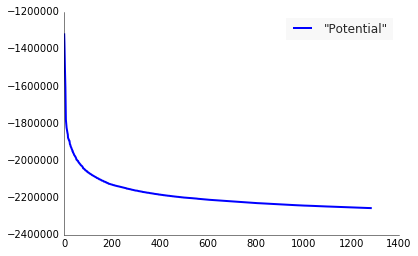

In [73]:
plotEnergy("em.edr")


### MD simulations were then performed at constant temperature, pressure and number of particles. The Berendson thermostat was applied with a coupling constant of 0.1 ps. 

In [74]:
def plotTemperature(infile):
    os.system("gmx energy -f %s -o energy.xvg<<EOF\n57\n58\nEOF"%infile)
    fig,ax = plt.subplots()
    plotXVG(ax,"energy.xvg")
    ppl.legend(ax)
#     plt.legend()
    
def plotPressure(infile):
    os.system("gmx energy -f %s -o energy.xvg<<EOF\n15\nEOF"%infile)
    fig,ax = plt.subplots()
    plotXVG(ax,"energy.xvg")
    ppl.legend(ax)
#     plt.legend()
    
def plotDensity(infile):
    os.system("gmx energy -f %s -o energy.xvg<<EOF\n21\nEOF"%infile)
    fig,ax = plt.subplots()
    plotXVG(ax,"energy.xvg")
    ppl.legend(ax)
#     plt.legend()
    
def plotRMSD(infileMD,infileTraj):
    os.system("gmx rms -s %s -f %s -o rmsd.xvg -tu ns<<EOF\n4\n4\nEOF"%(infileMD,infileTraj))
    fig,ax = plt.subplots()
    plotXVG(ax,"rmsd.xvg")
    plt.title("RMSD")

## NPT Coupling

Coordinates and velocities were saved every 2 ps.

In [88]:
file=open("npt.mdp","w")
file.write("""
; VARIOUS PREPROCESSING OPTIONS
title                    = 
cpp                      = /lib/cpp
include                  = 
define                   = 

; RUN CONTROL PARAMETERS
integrator               = md
tinit                    = 0
dt                       = 0.002
nsteps                   = 5000 ; 2 ps
nstcomm                  = 0

; OUTPUT CONTROL OPTIONS
nstxout                  = 0
nstvout                  = 0
nstfout                  = 0
nstlog                   = 1
nstenergy                = 1
nstxtcout                = 0
xtc_precision            = 1000
xtc-grps                 = System
energygrps               = Protein Non-Protein

; NEIGHBORSEARCHING PARAMETERS
nstlist                  = 5
ns-type                  = Grid
pbc                      = xyz
rlist                    = 0.9

; OPTIONS FOR ELECTROSTATICS AND VDW
coulombtype              = Reaction-Field
rcoulomb                 = 1.4
epsilon_rf               = 78
epsilon_r                = 1
vdw-type                 = Cut-off
rvdw                     = 1.4

; Temperature coupling  
Tcoupl                   = Berendsen
tc-grps                  = Protein  Non-Protein
tau_t                    = 0.1      0.1
ref_t                    = 300      300
; Pressure coupling     
Pcoupl                   = Berendsen
Pcoupltype               = Isotropic
tau_p                    = 1.0
compressibility          = 4.5e-5
ref_p                    = 1.0

; GENERATE VELOCITIES FOR STARTUP RUN
gen_vel                  = yes
gen_temp                 = 300.0
gen_seed                 = 173529

; OPTIONS FOR BONDS    
constraints              = all-bonds
constraint-algorithm     = Lincs
unconstrained-start      = no
lincs-order              = 4
lincs-iter               = 1
lincs-warnangle          = 30
""")
file.close()

In [90]:
! gmx grompp -f npt.mdp -c nvt.gro -p topol.top -o npt.tpr -maxwarn 4

                     :-) GROMACS - gmx grompp, 2017-dev (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra    Gerrit Groenhof  
 Christoph Junghans   Anca Hamuraru    Vincent Hindriksen Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff    Erik Marklund   
   Teemu Murtola       Szilard Pall       Sander Pronk      Roland Schulz   
  Alexey Shvetsov     Michael Shirts     Alfons Sijbers     Peter Tieleman  
  Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University, Stockholm Universit

In [91]:
! gmx mdrun -v -deffnm npt

                     :-) GROMACS - gmx mdrun, 2017-dev (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra    Gerrit Groenhof  
 Christoph Junghans   Anca Hamuraru    Vincent Hindriksen Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff    Erik Marklund   
   Teemu Murtola       Szilard Pall       Sander Pronk      Roland Schulz   
  Alexey Shvetsov     Michael Shirts     Alfons Sijbers     Peter Tieleman  
  Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University, Stockholm University

//anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
//anaconda/lib/python3.5/site-packages/matplotlib/legend.py:297: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
  reps)[:self.scatterpoints]


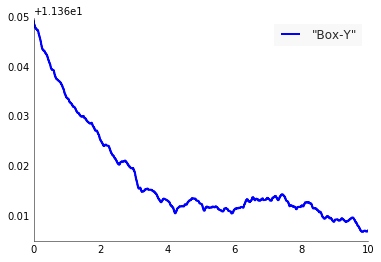

In [92]:
plotPressure("npt.edr")

//anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
//anaconda/lib/python3.5/site-packages/matplotlib/legend.py:297: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
  reps)[:self.scatterpoints]


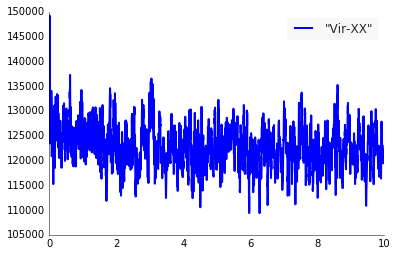

In [93]:
plotDensity("npt.edr")

//anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
//anaconda/lib/python3.5/site-packages/matplotlib/legend.py:297: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
  reps)[:self.scatterpoints]


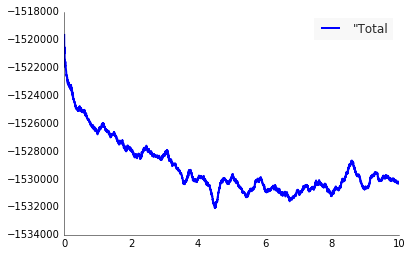

In [94]:
plotEnergy("npt.edr")

## MD Analysis

In [95]:
file=open("md.mdp","w")
file.write("""
title		= OPLS Lysozyme MD 
; Run parameters
integrator	= md		; leap-frog integrator
nsteps		= 500000	; 2 * 500000 = 1000 ps, 1 ns
dt		= 0.002		; 2 fs
; Output control
nstxout		= 1000		; save coordinates every 2 ps
nstvout		= 1000		; save velocities every 2 ps
nstxtcout	= 1000		; xtc compressed trajectory output every 2 ps
nstenergy	= 1000		; save energies every 2 ps
nstlog		= 1000		; update log file every 2 ps
; Bond parameters
continuation	= yes		; Restarting after NPT 
constraint_algorithm = lincs	; holonomic constraints 
constraints	= all-bonds	; all bonds (even heavy atom-H bonds) constrained
lincs_iter	= 1		; accuracy of LINCS
lincs_order	= 4		; also related to accuracy
; Neighborsearching
ns_type		= grid		; search neighboring grid cells
nstlist		= 5		; 10 fs
rlist		= 1.0		; short-range neighborlist cutoff (in nm)
rcoulomb	= 1.0		; short-range electrostatic cutoff (in nm)
rvdw		= 1.0		; short-range van der Waals cutoff (in nm)
; Electrostatics
coulombtype	= PME		; Particle Mesh Ewald for long-range electrostatics
pme_order	= 4		; cubic interpolation
fourierspacing	= 0.16		; grid spacing for FFT
; Temperature coupling is on
tcoupl		= V-rescale	; modified Berendsen thermostat
tc-grps		= Protein Non-Protein	; two coupling groups - more accurate
tau_t		= 0.1	0.1	; time constant, in ps
ref_t		= 300 	300	; reference temperature, one for each group, in K
; Pressure coupling is on
pcoupl		= Parrinello-Rahman	; Pressure coupling on in NPT
pcoupltype	= isotropic	; uniform scaling of box vectors
tau_p		= 2.0		; time constant, in ps
ref_p		= 1.0		; reference pressure, in bar
compressibility = 4.5e-5	; isothermal compressibility of water, bar^-1
; Periodic boundary conditions
pbc		= xyz		; 3-D PBC
; Dispersion correction
DispCorr	= EnerPres	; account for cut-off vdW scheme
; Velocity generation
gen_vel		= no		; Velocity generation is off 
""")
file.close()

In [98]:
! gmx grompp -f md.mdp -c npt.gro -p topol.top -o md.tpr -maxwarn 4

                     :-) GROMACS - gmx grompp, 2017-dev (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra    Gerrit Groenhof  
 Christoph Junghans   Anca Hamuraru    Vincent Hindriksen Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff    Erik Marklund   
   Teemu Murtola       Szilard Pall       Sander Pronk      Roland Schulz   
  Alexey Shvetsov     Michael Shirts     Alfons Sijbers     Peter Tieleman  
  Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University, Stockholm Universit

In [ ]:
! gmx mdrun -v -deffnm md

                     :-) GROMACS - gmx mdrun, 2017-dev (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra    Gerrit Groenhof  
 Christoph Junghans   Anca Hamuraru    Vincent Hindriksen Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff    Erik Marklund   
   Teemu Murtola       Szilard Pall       Sander Pronk      Roland Schulz   
  Alexey Shvetsov     Michael Shirts     Alfons Sijbers     Peter Tieleman  
  Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University, Stockholm University